### IS 445 Week 4 Assignment (Part -II)
#### Submitted by: Moazam I. Hakim

### Import Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plot

In [51]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import the data

In [52]:
buildings = pd.read_csv('https://uiuc-ischool-dataviz.github.io/spring2019online/week02/building_inventory.csv')
buildings.dtypes

Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object

#### Preview the dataframe

In [53]:
# Drop Missing Values or Incorrect Congress Districted marked as District Zero
drop_missing_dist=buildings.index[buildings["Congress Dist"] == 0].tolist()
buildings=buildings.drop(buildings.index[drop_missing_dist])
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,Senate Dist,Senator Full Name,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,47,Jil Tracy,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,47,Jil Tracy,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,47,Jil Tracy,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,47,Jil Tracy,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,47,Jil Tracy,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


### Visualization I - Total square footage as a function of congressional district ("Congress Dist")

In [54]:
by_congressdist = buildings.groupby(['Congress Dist'])[["Square Footage"]].sum()
by_congressdist.head()

,Square Footage
Congress Dist,
1,2351762
2,6285684
3,1293687
4,317741
5,1809022


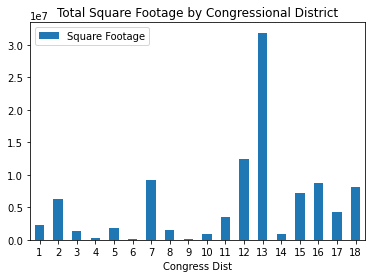

In [55]:
by_congressdist.plot.bar(y='Square Footage', rot=0, title="Total Square Footage by Congressional District")

### Observations
The data from the csv file has been represented to visualize the Square Footage in each Congresstional District used by various state agencies. I used the group by feature of pandas to organize the dataframe and extract the information i needed for this. This visualization was pretty easy and didnot involve a lot of transformation and changes.

### Visualization II - Average square footage per floor as a function of congressional district

In [56]:
by_congressdist_f = buildings.groupby(['Congress Dist'])[["Square Footage","Total Floors"]].sum()
by_congressdist_f['Avg_Square Footage Per Floor'] = by_congressdist_f['Square Footage']/by_congressdist_f['Total Floors']
by_congressdist_f.head(19)


,Square Footage,Total Floors,Avg_Square Footage Per Floor
Congress Dist,,,
1,2351762,134,17550.462687
2,6285684,647,9715.122102
3,1293687,72,17967.875000
4,317741,21,15130.523810
5,1809022,113,16009.044248
6,145659,28,5202.107143
7,9211651,517,17817.506770
8,1461548,312,4684.448718
9,77978,11,7088.909091


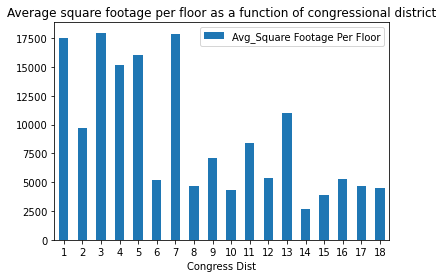

In [57]:
by_congressdist_f.plot.bar(y='Avg_Square Footage Per Floor', rot=0, title="Average square footage per floor as a function of congressional district")

### Observation

In this I first extracted the required information ie Congress District, total square footage and total number of floors in all the buildings. then I evaluated the Average using this information in a sepearte column in the data frame and used that to plot using Matplotlib. 

### Visualization III - Square footage for the five most common departments (aka "Agency Name") as a function of year.

We will first find the five most common departments by filtering and sorting the data in the dataframe. 

In [58]:
buildings['Newest Construction Year'] = buildings['Year Constructed']
by_mostcommon= (buildings.groupby('Agency Name', as_index=True)
       .agg({'Square Footage':'sum','Agency Name':'count','Year Constructed':'mean', 'Newest Construction Year':'max'})
       .rename(columns={'Agency Name':'Count', 'Year Constructed':'Mean Construction Year'} ))
import numpy as np
by_mostcommon=by_mostcommon.sort_values(by=['Count'],ascending=False)
by_mostcommon['Mean Construction Year'] = by_mostcommon['Mean Construction Year'].apply(np.int64)
df =by_mostcommon.head(5)
df.head()

,Square Footage,Count,Mean Construction Year,Newest Construction Year
Agency Name,,,,
Department of Natural Resources,3897070,3201,1872,2016
Department of Corrections,15120750,1428,1944,2016
Department of Transportation,5604159,1124,1892,2019
Department of Human Services,8093990,530,1939,2014
University of Illinois,25018006,525,1955,2015


### Using Construction Year for comparison.

In [59]:
selected = buildings.groupby(['Agency Name', 'Year Constructed', 'Square Footage']).count().reset_index()
selected=selected.set_index('Agency Name')
SortedData = selected.loc[ ['Department of Natural Resources' , 'Department of Corrections', 'Department of Transportation', 'Department of Human Services', 'University of Illinois'] , : ]
SortedData = (SortedData.groupby(['Agency Name', 'Year Constructed'])[["Square Footage"]].sum()).reset_index()
drop_missing=SortedData.index[SortedData["Year Constructed"] == 0].tolist() # Drop entries with values Zero
SortedData=SortedData.drop(SortedData.index[drop_missing])
drop_missing=SortedData.index[SortedData["Square Footage"] == 0].tolist() # Drop entries with values Zero
SortedData=SortedData.drop(SortedData.index[drop_missing])
SortedData=SortedData.set_index('Agency Name')
SortedData.head()

,Year Constructed,Square Footage
Agency Name,,
Department of Corrections,1858,7367
Department of Corrections,1860,20160
Department of Corrections,1863,15795
Department of Corrections,1865,143955
Department of Corrections,1876,35080


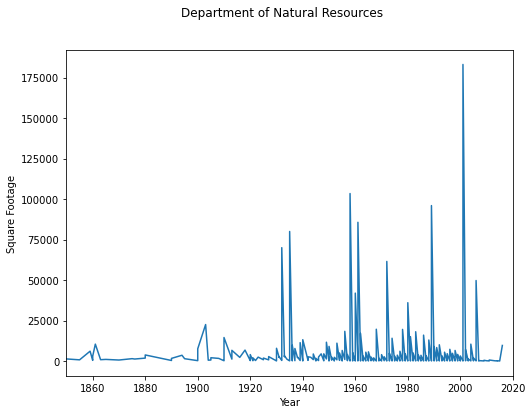

In [60]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

SortedData1 = selected.loc[ ['Department of Natural Resources'] , : ]
x = SortedData1['Year Constructed']
y = SortedData1['Square Footage']

fig= plt.figure(figsize=(8, 6))
ax= plt.axes()
fig.suptitle('Department of Natural Resources')
ax.set_ylabel('Square Footage')
ax.set_xlabel('Year')
plt.xlim(1850, 2020)
ax.plot(x, y)

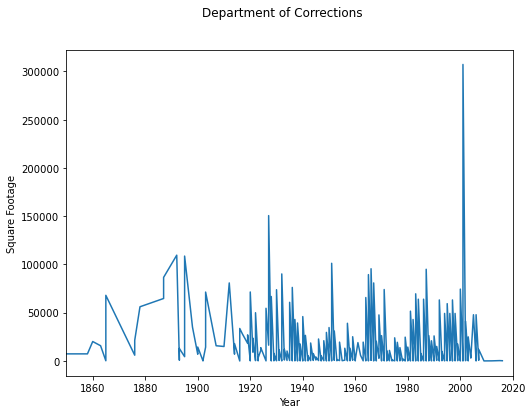

In [61]:
SortedData2 = selected.loc[ ['Department of Corrections'] , : ]
x = SortedData2['Year Constructed']
y = SortedData2['Square Footage']

fig= plt.figure(figsize=(8, 6))
ax= plt.axes()
fig.suptitle('Department of Corrections')
ax.set_ylabel('Square Footage')
ax.set_xlabel('Year')
plt.xlim(1850, 2020)
ax.plot(x, y)

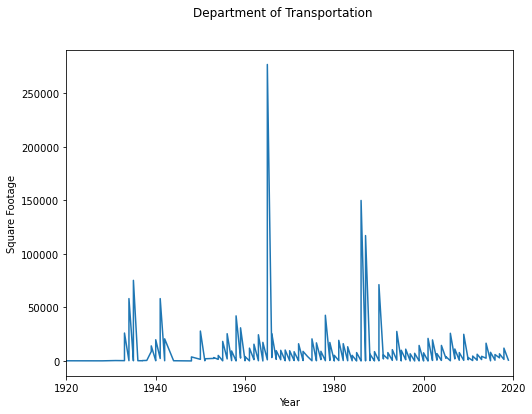

In [62]:
SortedData3 = selected.loc[ ['Department of Transportation'] , : ]
x = SortedData3['Year Constructed']
y = SortedData3['Square Footage']

fig= plt.figure(figsize=(8, 6))
ax= plt.axes()
fig.suptitle('Department of Transportation')
ax.set_ylabel('Square Footage')
ax.set_xlabel('Year')
plt.xlim(1920, 2020)
ax.plot(x, y)

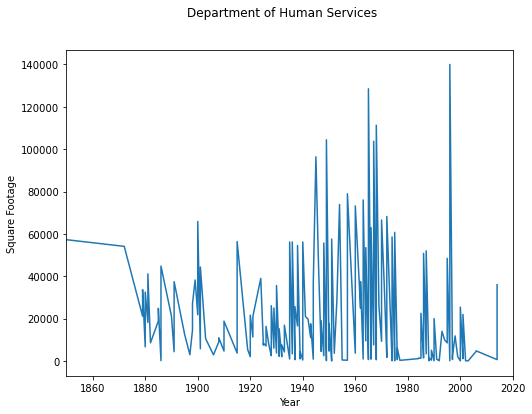

In [63]:
SortedData4 = selected.loc[ ['Department of Human Services'] , : ]
x = SortedData4['Year Constructed']
y = SortedData4['Square Footage']

fig= plt.figure(figsize=(8, 6))
ax= plt.axes()
fig.suptitle('Department of Human Services')
ax.set_ylabel('Square Footage')
ax.set_xlabel('Year')
plt.xlim(1850, 2020)
ax.plot(x, y)

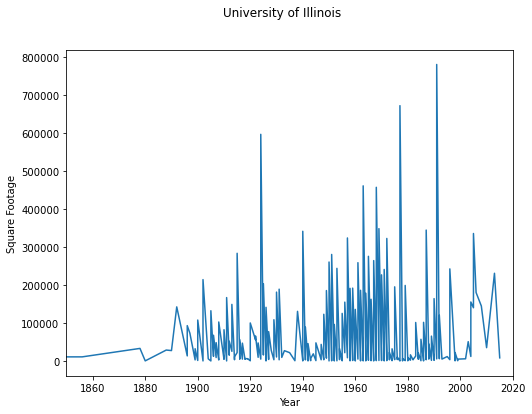

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

SortedData5 = selected.loc[ ['University of Illinois'] , : ]
x = SortedData5['Year Constructed']
y = SortedData5['Square Footage']

fig= plt.figure(figsize=(8, 6))
ax= plt.axes()
fig.suptitle('University of Illinois')
ax.set_ylabel('Square Footage')
ax.set_xlabel('Year')
plt.xlim(1850, 2020)
ax.plot(x, y)



### Observations
This was the most challenging visualization for me as I was not sure how to use the information we have to represent it. For this poart I first evasluated the top 5 most common agencies that featured for most number of buildings in the dataframe. After that I individually plotted data for each of the 5 agencies for the given period in dataset. I am comapring each Agency and how many square foots of space it added every year and plotting this info in 5 seperate graphs. I was facing a lot of difficulties in organizing this information according to the criterea i needed but after doing some research and practicing multiple code types I figured it out.
I am also not sure about the methodology i have used to drop the entries with zero congress district, zero marked construction year or zero square footage.